<a href="https://colab.research.google.com/github/sagarkakkar03/Data-science/blob/main/diabetes_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Problem
Create a model to predict if a patient is Diabetic.

### Import relevant libraries

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import SimpleImputer, IterativeImputer, KNNImputer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve, roc_auc_score, accuracy_score, classification_report, confusion_matrix
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, RobustScaler
import numpy as np
from sklearn.compose import ColumnTransformer
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, HistGradientBoostingClassifier, AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB

### Import and Load data

In [ ]:
from google.colab import files
files.upload()
df = pd.read_csv('diabetes.csv')

Saving diabetes.csv to diabetes.csv


### EDA

In [ ]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [ ]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [ ]:
df["Outcome"].mean()

np.float64(0.3489583333333333)

Insight: **Only 35% patients contain daibetes. There is a class imbalance between diabetic and non-diabetic.**

Understand correlation between features and outcome.

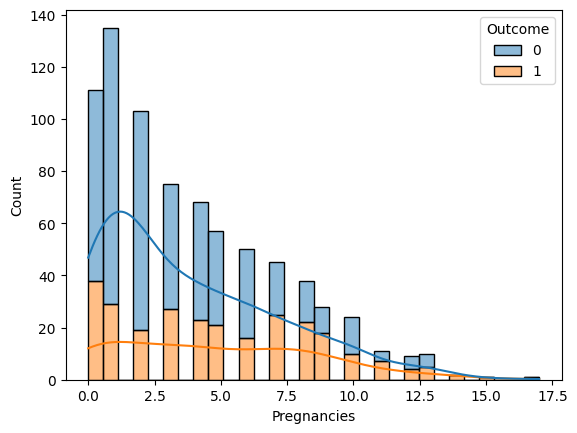

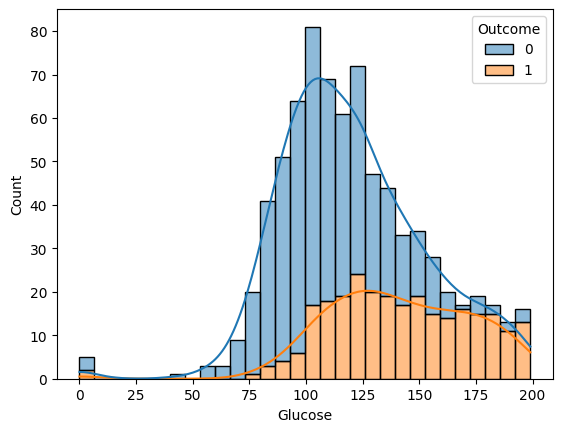

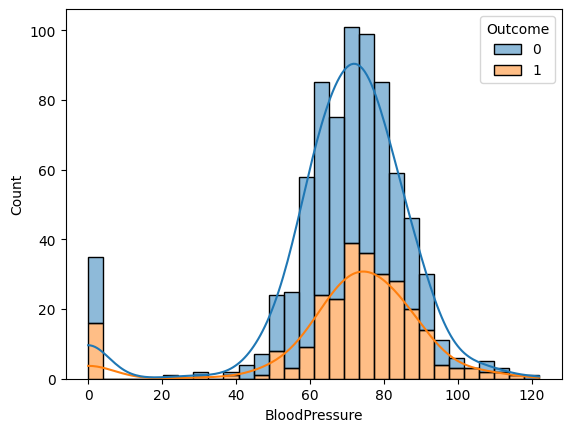

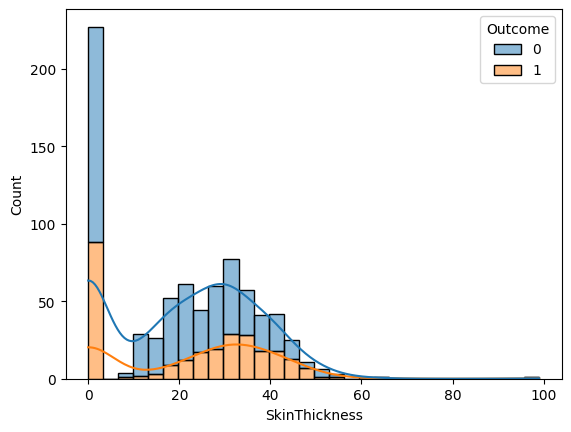

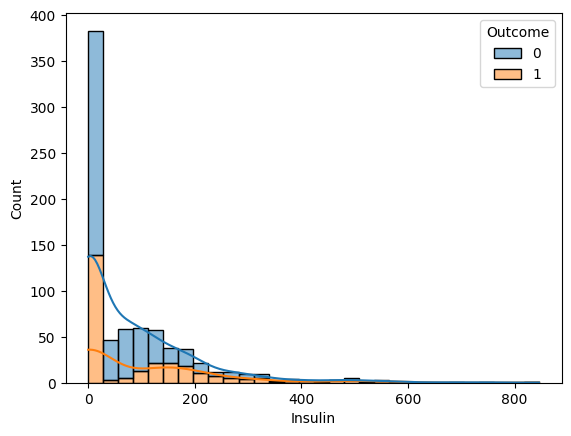

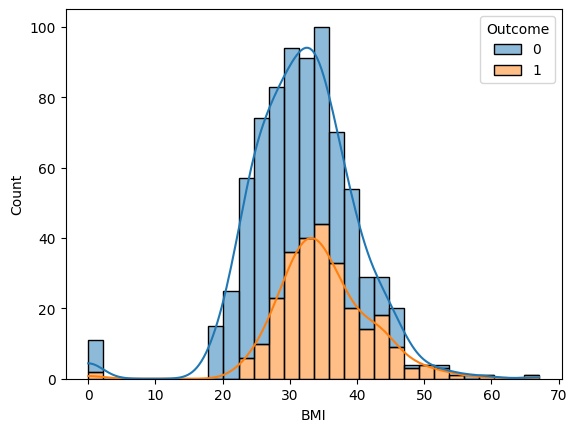

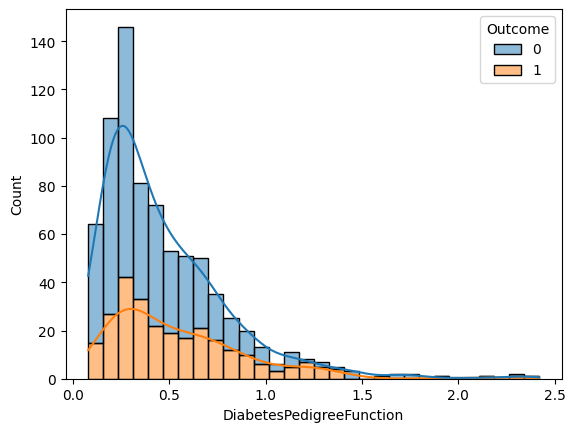

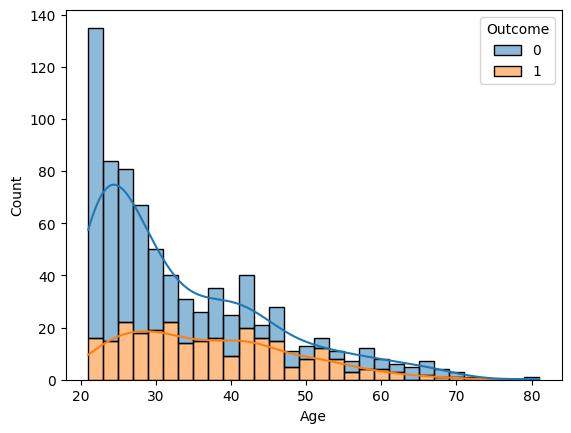

In [ ]:
for col in df.columns:
  if col == 'Outcome':
    continue
  sns.histplot(data = df, x = col, kde=True, bins =30, hue='Outcome', multiple='stack')
  plt.show()

Insight: **["Glucose",	"BloodPressure",	"SkinThickness",	"Insulin",	"BMI"] seem to have correlation with Outcome.**

In [ ]:
cols = ["Glucose",	"BloodPressure",	"SkinThickness",	"Insulin",	"BMI"]
(df[cols] == 0).sum()

,0
Glucose,5
BloodPressure,35
SkinThickness,227
Insulin,374
BMI,11


<Axes: >

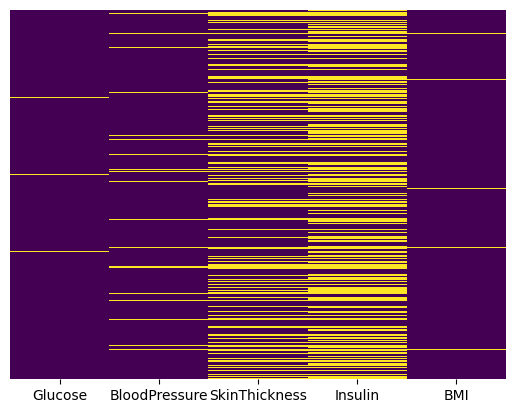

In [ ]:
sns.heatmap(df[cols] == 0, yticklabels=False, cbar=False, cmap="viridis")

Insight: **A lot of rows contain empty values.**


Dropping insulin because of its not very strong correlation and it contains a lot of missing values. It results in change in correlation with other features and highly increased variance.


> Note: It resulted in poor accuracy when it was used during experimentation.







### Feature Engineering

In [ ]:
X = df[['Glucose', 'Pregnancies', 'BMI', 'DiabetesPedigreeFunction', 'Age']]
y = df['Outcome']

In [ ]:
X = X.copy()
zero_missing_cols = ['Glucose', 'BMI']
X[zero_missing_cols] = X[zero_missing_cols].replace(0, np.nan)

# Training the model

### Using Random Forest

> Note: Random Forest works best experimental.




In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
rf = Pipeline([("imp", IterativeImputer(random_state=42, max_iter=10, initial_strategy="median")), ("clf", RandomForestClassifier(n_estimators=500, random_state=42, class_weight="balanced"))])
rf.fit(X_train, y_train)
threshold = 0.5
probs = rf.predict_proba(X_test)[:, 1]
pred_custom = (probs >= threshold).astype(int)
y_pred = rf.predict(X_test)
cm = confusion_matrix(y_test, pred_custom)

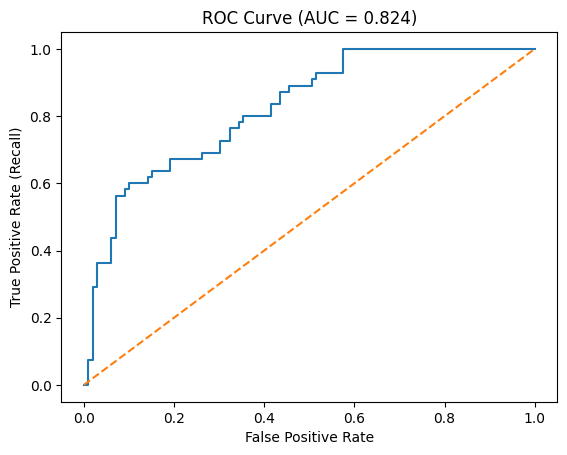

Accuracy: 0.7922077922077922
Report:               precision    recall  f1-score   support

           0       0.85      0.82      0.84        99
           1       0.69      0.75      0.72        55

    accuracy                           0.79       154
   macro avg       0.77      0.78      0.78       154
weighted avg       0.80      0.79      0.79       154



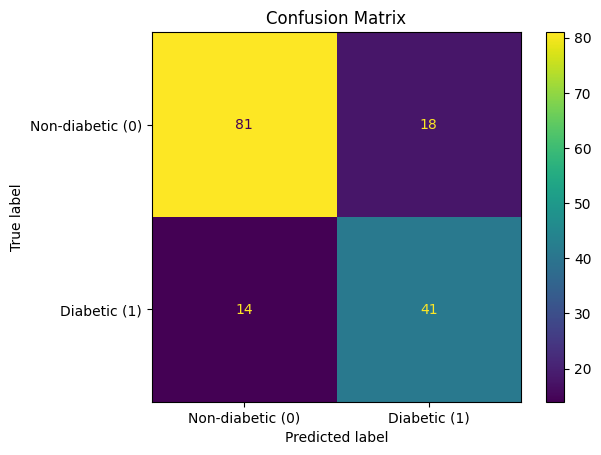

In [ ]:
print("Accuracy:", accuracy_score(y_test, pred_custom))
print("Report:", classification_report(y_test, pred_custom))
disp = ConfusionMatrixDisplay(cm, display_labels=["Non-diabetic (0)", "Diabetic (1)"])
disp.plot(values_format="d")
plt.title("Confusion Matrix")
plt.show()

# Using different algorithms


### **Logistic Regression**

Using SMOTE to fix imabalance and penalizing model to improve recall for diabetic patients


> Note: Used logistic regression experimental. Also, simple imputer is working better than KNN.

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


pipe = Pipeline([
    ("imputer", SimpleImputer(strategy="median")),
    ("scaler", StandardScaler()),
    ("smote", SMOTE(random_state=42)),
    ("model", LogisticRegression(max_iter = 1000))
])
pipe.set_params(model=LogisticRegression(max_iter=1000, class_weight={0:1, 1:2}))

pipe.fit(X_train, y_train)

Pipeline(steps=[('imputer', SimpleImputer(strategy='median')),
                ('scaler', StandardScaler()), ('smote', SMOTE(random_state=42)),
                ('model',
                 LogisticRegression(class_weight={0: 1, 1: 2}, max_iter=1000))])

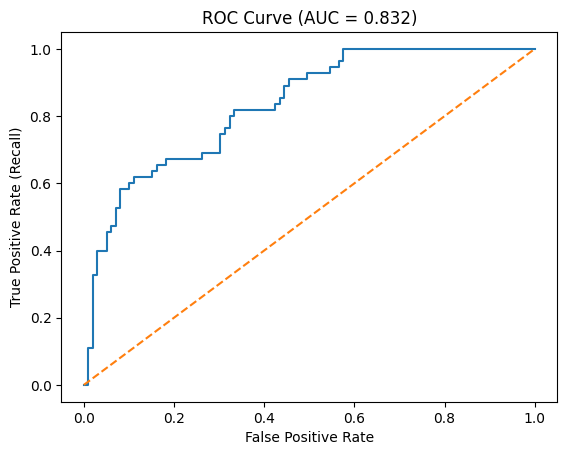

In [ ]:
y_score = pipe.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_score)

auc = roc_auc_score(y_test, y_score)

plt.figure()
plt.plot(fpr, tpr)
plt.plot([0, 1], [0, 1], linestyle="--")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate (Recall)")
plt.title(f"ROC Curve (AUC = {auc:.3f})")
plt.show()

In [ ]:
probs = pipe.predict_proba(X_test)[:, 1]
pred_custom = (probs >= threshold).astype(int)
y_pred = pipe.predict(X_test)
print("Accuracy:", accuracy_score(y_test, pred_custom))
print("Report:", classification_report(y_test, pred_custom))
cm = confusion_matrix(y_test, pred_custom)
print("Confusion Matrix:", cm)

Accuracy: 0.7532467532467533
Report:               precision    recall  f1-score   support

           0       0.81      0.80      0.81        99
           1       0.65      0.67      0.66        55

    accuracy                           0.75       154
   macro avg       0.73      0.74      0.73       154
weighted avg       0.76      0.75      0.75       154

Confusion Matrix: [[79 20]
 [18 37]]


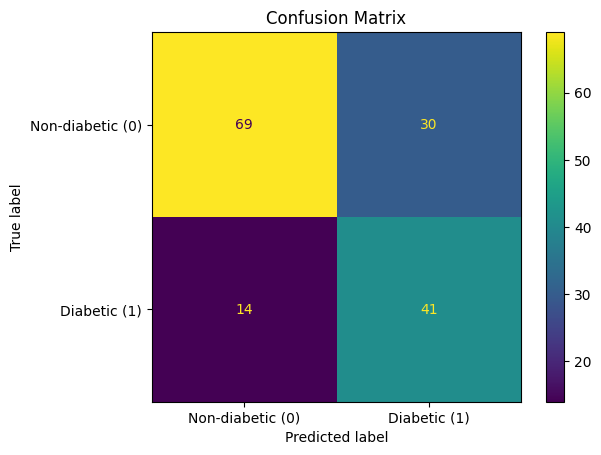

In [ ]:
disp = ConfusionMatrixDisplay(cm, display_labels=["Non-diabetic (0)", "Diabetic (1)"])
disp.plot(values_format="d")
plt.title("Confusion Matrix")
plt.show()

### Using KNN imputer



In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
num_cols = X_train.select_dtypes(include=np.number).columns
preprocess = ColumnTransformer(
    transformers=[
        ("knn", KNNImputer(n_neighbors=5, weights="distance"), num_cols),
    ],
    remainder="drop")

pipe = Pipeline([
    ("preprocess", preprocess),
    ("scaler", StandardScaler()),
    ("model", LogisticRegression(max_iter = 1000))
])
pipe.set_params(model=LogisticRegression(max_iter=1000, class_weight={0:1, 1:2}))

pipe.fit(X_train, y_train)

Pipeline(steps=[('preprocess',
                 ColumnTransformer(transformers=[('knn',
                                                  KNNImputer(weights='distance'),
                                                  Index(['Glucose', 'Pregnancies', 'BMI', 'DiabetesPedigreeFunction', 'Age'], dtype='object'))])),
                ('scaler', StandardScaler()),
                ('model',
                 LogisticRegression(class_weight={0: 1, 1: 2}, max_iter=1000))])

In [ ]:
probs = pipe.predict_proba(X_test)[:, 1]
threshold = 0.63
pred_custom = (probs >= threshold).astype(int)
y_pred = pipe.predict(X_test)
print("Accuracy:", accuracy_score(y_test, pred_custom))
print("Report:", classification_report(y_test, pred_custom))
cm = confusion_matrix(y_test, pred_custom)
print("Confusion Matrix:", cm)

Accuracy: 0.7142857142857143
Report:               precision    recall  f1-score   support

           0       0.83      0.70      0.76        99
           1       0.58      0.75      0.65        55

    accuracy                           0.71       154
   macro avg       0.70      0.72      0.70       154
weighted avg       0.74      0.71      0.72       154

Confusion Matrix: [[69 30]
 [14 41]]


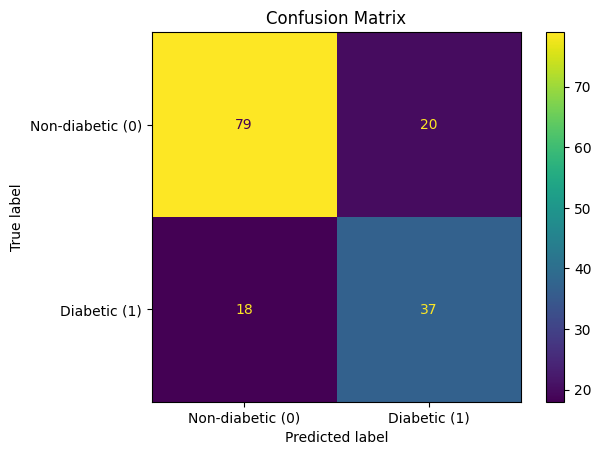

In [ ]:
disp = ConfusionMatrixDisplay(cm, display_labels=["Non-diabetic (0)", "Diabetic (1)"])
disp.plot(values_format="d")
plt.title("Confusion Matrix")
plt.show()

Creating pipelines for different models

In [ ]:
mlp = Pipeline([("imp", SimpleImputer(strategy="median")), ("scaler", StandardScaler()), ("mlp", MLPClassifier(hidden_layer_sizes=(32,16), max_iter=2000, random_state=42))])
svm = Pipeline([("imp", SimpleImputer(strategy="median")), ("sc", StandardScaler()), ("clf", SVC(kernel="rbf", class_weight="balanced", probability=True))])
hgb = Pipeline([("imp", SimpleImputer(strategy="median")), ("clf", HistGradientBoostingClassifier(random_state=42))])
ada = Pipeline([("imp", SimpleImputer(strategy="median")), ("clf", AdaBoostClassifier(random_state=42))])
knn = Pipeline([("imp", SimpleImputer(strategy="median")), ("sc", StandardScaler()), ("clf", KNeighborsClassifier(n_neighbors=15))])
nb  = Pipeline([("imp", SimpleImputer(strategy="median")), ("clf", GaussianNB())])


In [ ]:
mlp.fit(X_train, y_train)
svm.fit(X_train, y_train)
hgb.fit(X_train, y_train)
ada.fit(X_train, y_train)
knn.fit(X_train, y_train)
nb.fit(X_train, y_train)

Pipeline(steps=[('imp', SimpleImputer(strategy='median')),
                ('clf', GaussianNB())])

#### **MLP classifier**

In [ ]:
probs = pipe.predict_proba(X_test)[:, 1]
pred_custom = (probs >= threshold).astype(int)
y_pred = mlp.predict(X_test)
cm = confusion_matrix(y_test, pred_custom)


Accuracy: 0.7272727272727273
Report:               precision    recall  f1-score   support

           0       0.81      0.76      0.78        99
           1       0.61      0.67      0.64        55

    accuracy                           0.73       154
   macro avg       0.71      0.72      0.71       154
weighted avg       0.74      0.73      0.73       154



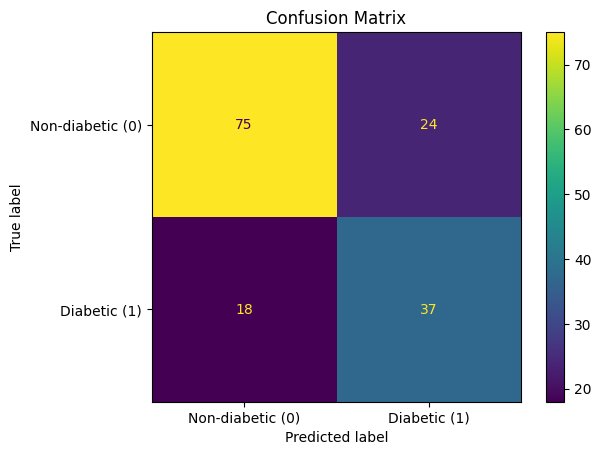

In [ ]:
print("Accuracy:", accuracy_score(y_test, pred_custom))
print("Report:", classification_report(y_test, pred_custom))
disp = ConfusionMatrixDisplay(cm, display_labels=["Non-diabetic (0)", "Diabetic (1)"])
disp.plot(values_format="d")
plt.title("Confusion Matrix")
plt.show()

#### **SVM**

In [ ]:
probs = svm.predict_proba(X_test)[:, 1]
pred_custom = (probs >= threshold).astype(int)
y_pred = svm.predict(X_test)
cm = confusion_matrix(y_test, pred_custom)

Accuracy: 0.7532467532467533
Report:               precision    recall  f1-score   support

           0       0.78      0.86      0.82        99
           1       0.69      0.56      0.62        55

    accuracy                           0.75       154
   macro avg       0.73      0.71      0.72       154
weighted avg       0.75      0.75      0.75       154



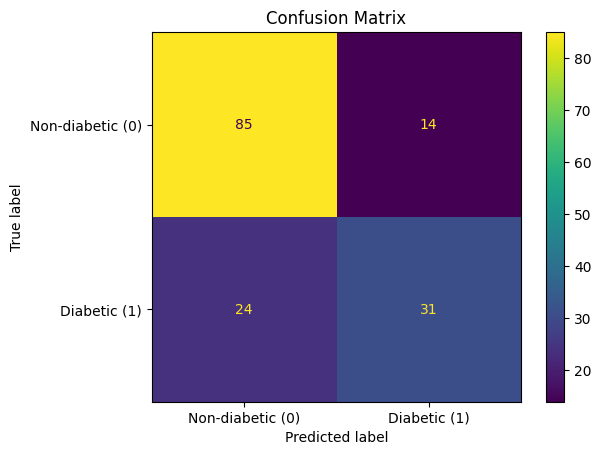

In [ ]:
print("Accuracy:", accuracy_score(y_test, pred_custom))
print("Report:", classification_report(y_test, pred_custom))
disp = ConfusionMatrixDisplay(cm, display_labels=["Non-diabetic (0)", "Diabetic (1)"])
disp.plot(values_format="d")
plt.title("Confusion Matrix")
plt.show()

Accuracy: 0.7532467532467533
Report:               precision    recall  f1-score   support

           0       0.82      0.79      0.80        99
           1       0.64      0.69      0.67        55

    accuracy                           0.75       154
   macro avg       0.73      0.74      0.74       154
weighted avg       0.76      0.75      0.76       154



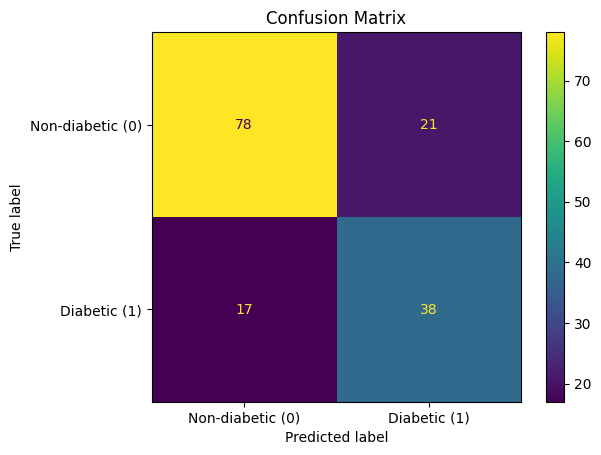

In [ ]:
probs = hgb.predict_proba(X_test)[:, 1]
pred_custom = (probs >= threshold).astype(int)
y_pred = hgb.predict(X_test)
cm = confusion_matrix(y_test, pred_custom)
print("Accuracy:", accuracy_score(y_test, pred_custom))
print("Report:", classification_report(y_test, pred_custom))
disp = ConfusionMatrixDisplay(cm, display_labels=["Non-diabetic (0)", "Diabetic (1)"])
disp.plot(values_format="d")
plt.title("Confusion Matrix")
plt.show()

#### **ADA Booster**



Accuracy: 0.7727272727272727
Report:               precision    recall  f1-score   support

           0       0.83      0.81      0.82        99
           1       0.67      0.71      0.69        55

    accuracy                           0.77       154
   macro avg       0.75      0.76      0.76       154
weighted avg       0.78      0.77      0.77       154



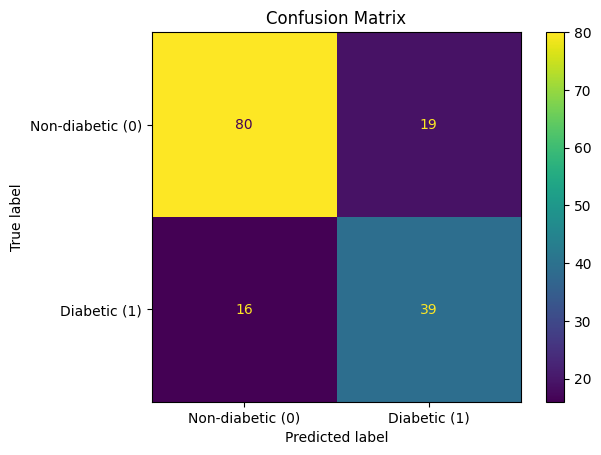

In [ ]:
probs = ada.predict_proba(X_test)[:, 1]
pred_custom = (probs >= threshold).astype(int)
y_pred = ada.predict(X_test)
cm = confusion_matrix(y_test, pred_custom)
print("Accuracy:", accuracy_score(y_test, pred_custom))
print("Report:", classification_report(y_test, pred_custom))
disp = ConfusionMatrixDisplay(cm, display_labels=["Non-diabetic (0)", "Diabetic (1)"])
disp.plot(values_format="d")
plt.title("Confusion Matrix")
plt.show()

#### **KNN**

Accuracy: 0.7272727272727273
Report:               precision    recall  f1-score   support

           0       0.78      0.80      0.79        99
           1       0.62      0.60      0.61        55

    accuracy                           0.73       154
   macro avg       0.70      0.70      0.70       154
weighted avg       0.73      0.73      0.73       154



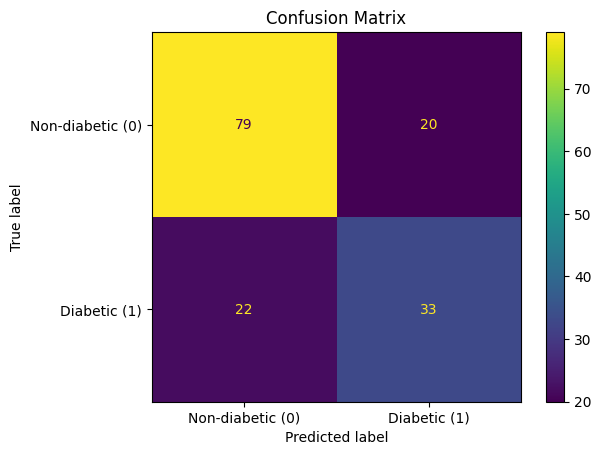

In [ ]:
probs = knn.predict_proba(X_test)[:, 1]
pred_custom = (probs >= threshold).astype(int)
y_pred = knn.predict(X_test)
cm = confusion_matrix(y_test, pred_custom)
print("Accuracy:", accuracy_score(y_test, pred_custom))
print("Report:", classification_report(y_test, pred_custom))
disp = ConfusionMatrixDisplay(cm, display_labels=["Non-diabetic (0)", "Diabetic (1)"])
disp.plot(values_format="d")
plt.title("Confusion Matrix")
plt.show()

#### **Naive Bayes**

Accuracy: 0.7532467532467533
Report:               precision    recall  f1-score   support

           0       0.81      0.80      0.81        99
           1       0.65      0.67      0.66        55

    accuracy                           0.75       154
   macro avg       0.73      0.74      0.73       154
weighted avg       0.76      0.75      0.75       154



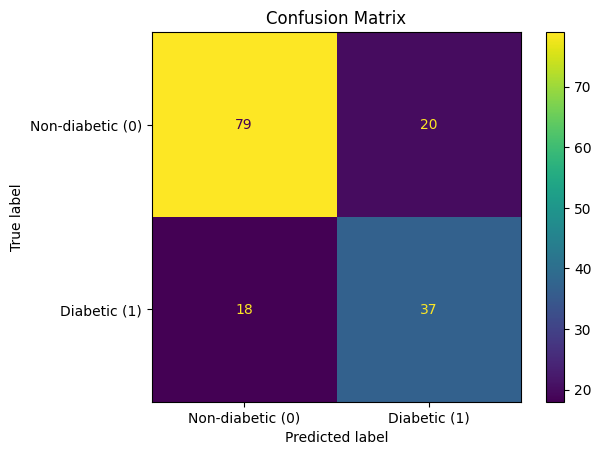

In [ ]:
probs = nb.predict_proba(X_test)[:, 1]
pred_custom = (probs >= threshold).astype(int)
y_pred = nb.predict(X_test)
cm = confusion_matrix(y_test, pred_custom)
print("Accuracy:", accuracy_score(y_test, pred_custom))
print("Report:", classification_report(y_test, pred_custom))
disp = ConfusionMatrixDisplay(cm, display_labels=["Non-diabetic (0)", "Diabetic (1)"])
disp.plot(values_format="d")
plt.title("Confusion Matrix")
plt.show()